In [1]:
states = ['MT', 'WV', 'ID', 'ME', 'NM', 'NE', 'AR', 'KS', 'MS', 'IA' ]
objective_types = ['cut_edges', 'perimeter', 'inverse_Polsby_Popper', 'average_Polsby_Popper', 'bottleneck_Polsby_Popper']
pairs = [ (state,2020) for state in states ] + [ ('WV', 2010) ]

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)
sys.path.append(os.path.abspath('../heuristic'))

In [3]:
from read import read_graph_from_json
from metrics import scores
import importlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style = "darkgrid")

def plot_pareto_frontier_sns(Xs, Ys, maxX=True, maxY=True, xlabel='X label', ylabel='Y label', title='title'):
    '''Pareto frontier selection process
    :param Xs: Series of X values
    :param Ys: Series of Y values
    :param maxX: True if maximizing on X
    :param maxY: True if maximizing on Y
    :param xlabel: plot label for X
    :param ylabel: plot label for Y
    :param title: plot title
    '''
    # for convenience, convert everything to minimization terms (by multiplying by -1 if necessary)
    sorted_list = sorted([[-Xs[i] if maxX else Xs[i], -Ys[i] if maxY else Ys[i]] for i in range(len(Xs))],key=lambda p: (p[0], p[1]))
    pair = sorted_list[0]
    pareto_front = [ [-pair[0] if maxX else pair[0], -pair[1] if maxY else pair[1] ] ]
    bestY = pair[1]
    for pair in sorted_list[1:]:
        if pair[1] < bestY:
            pareto_front.append([-pair[0] if maxX else pair[0], -pair[1] if maxY else pair[1] ]) # multiply by -1 again to undo it
            bestY = pair[1]

    '''Plotting process'''
    if len(Xs) < 1000:
        s1 = 15
    elif len(Xs) < 10000:
        s1 = 10
    else:
        s1 = 5
    s2 = 6 * s1

    plot = sns.scatterplot(x=Xs, y=Ys,s=s1)
    plot.set_title(title)
    plot.set_xlabel("deviation (+/-%)")
    plot.set_ylabel(obj_type)
    plot.set_xlim(-0.04,1.04)
    
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plot2 = sns.scatterplot(x=pf_X,y=pf_Y, color='red',s=s2,marker='*')

    plt.show()

    print("nondominated:",pareto_front)
    
    return pareto_front

The state of MT has 2 districts.
Loaded 150 plans from file.


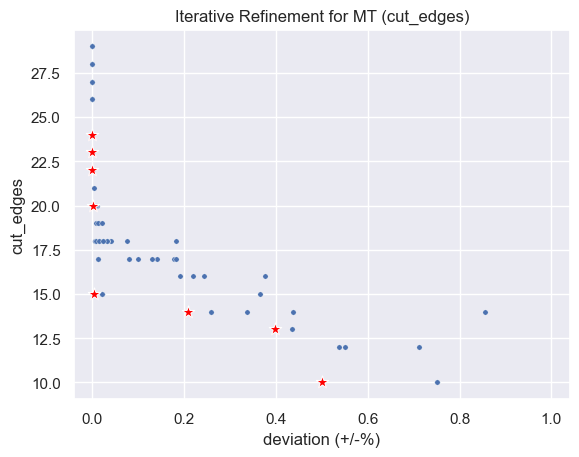

nondominated: [[9.223e-05, 24], [0.0002767, 23], [0.00064562, 22], [0.00083009, 20], [0.00341258, 15], [0.20927391, 14], [0.39853351, 13], [0.49961954, 10]]


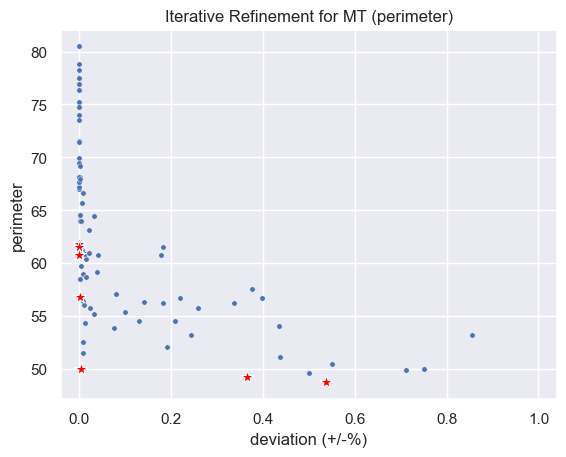

nondominated: [[9.223e-05, 61.76321202], [0.0002767, 61.54509757], [0.00064562, 60.72817971], [0.00083009, 56.82989152], [0.00341258, 49.99006104], [0.36477668, 49.20314866], [0.53706565, 48.71880081]]


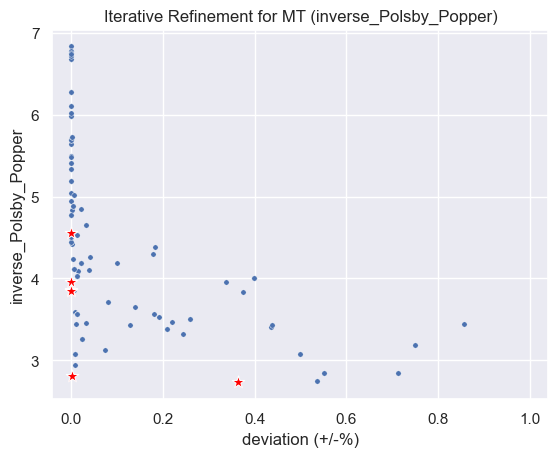

nondominated: [[9.223e-05, 4.54910623], [0.0002767, 3.96082877], [0.00064562, 3.8565928], [0.00083009, 3.84382878], [0.00341258, 2.81054019], [0.36477668, 2.7285018]]


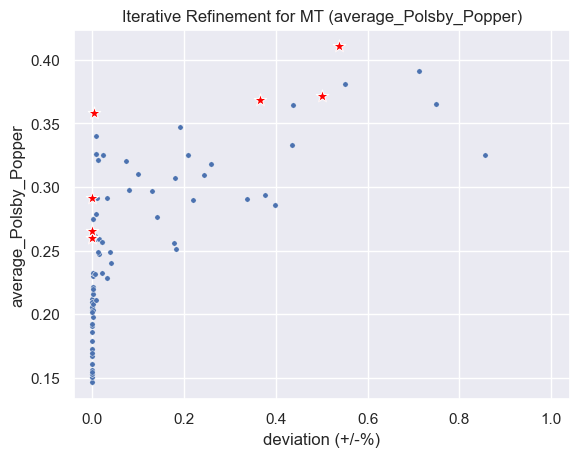

nondominated: [[9.223e-05, 0.26010673], [0.0002767, 0.26026015], [0.00064562, 0.26557271], [0.00083009, 0.29107979], [0.00341258, 0.35799952], [0.36477668, 0.36800379], [0.49961954, 0.37157736], [0.53706565, 0.41055562]]


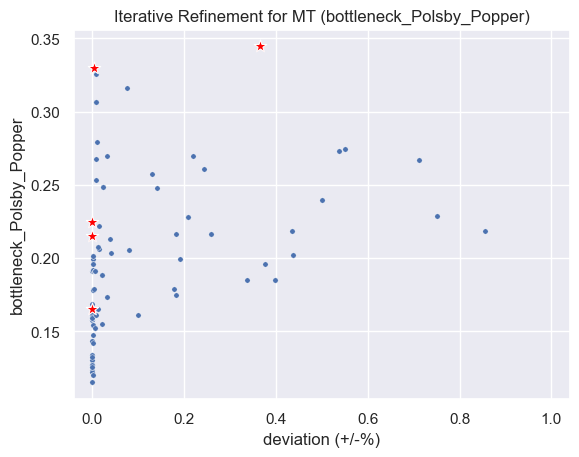

nondominated: [[9.223e-05, 0.16497369], [0.0002767, 0.21523974], [0.00064562, 0.22474552], [0.00341258, 0.32996062], [0.36477668, 0.34449106]]
The state of WV has 2 districts.
Loaded 160 plans from file.


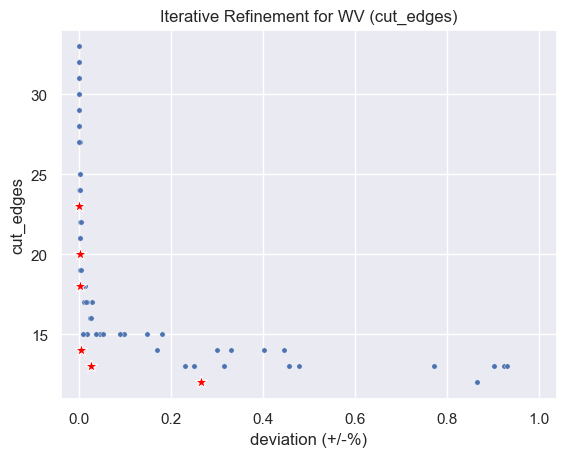

nondominated: [[0.0, 23], [0.000223, 20], [0.0014495, 18], [0.00423701, 14], [0.02497608, 13], [0.26492488, 12]]


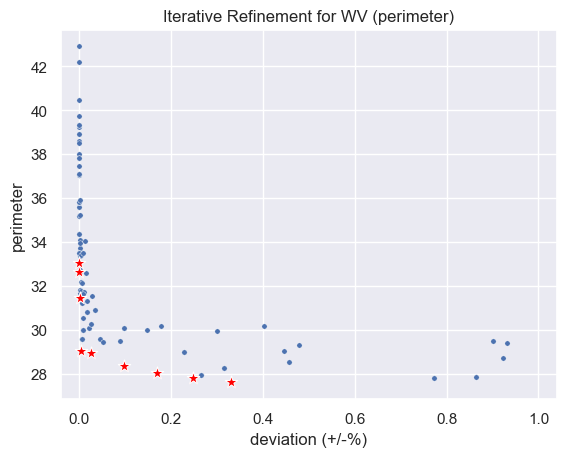

nondominated: [[0.0, 33.0544207], [0.0001115, 32.6116069], [0.001115, 31.45804445], [0.00423701, 29.00571692], [0.02497608, 28.95506543], [0.09667082, 28.3451219], [0.16836556, 28.03035351], [0.24864583, 27.7800778], [0.3304871, 27.5959683]]


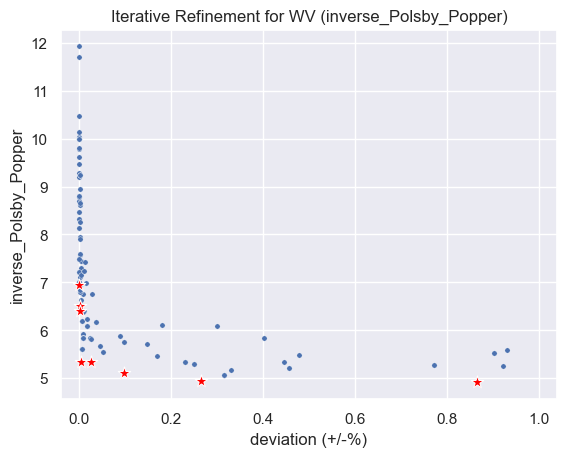

nondominated: [[0.0, 6.95490728], [0.001115, 6.50939419], [0.00234151, 6.40702147], [0.00423701, 5.33653039], [0.02497608, 5.32754146], [0.09667082, 5.10721965], [0.26492488, 4.95022105], [0.86501988, 4.91156207]]


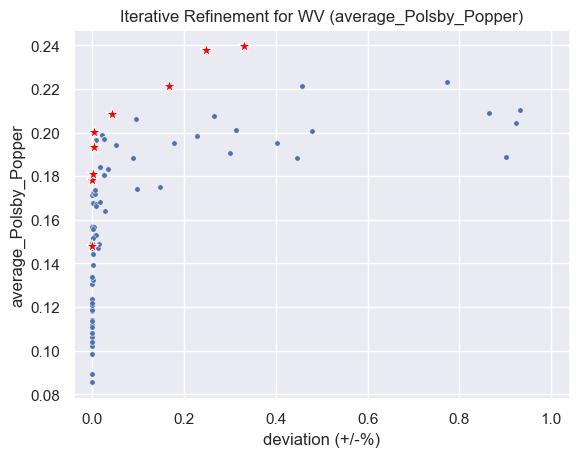

nondominated: [[0.0, 0.14821159], [0.0001115, 0.17844856], [0.00156101, 0.1810138], [0.00423701, 0.19354189], [0.00501752, 0.2002479], [0.04437715, 0.20851288], [0.16836556, 0.22144908], [0.24864583, 0.23758746], [0.3304871, 0.23947554]]


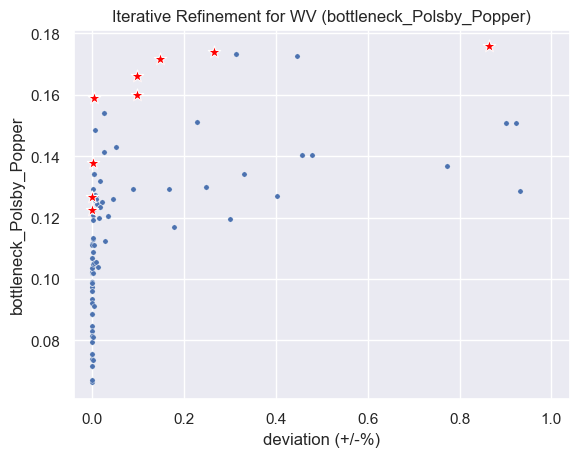

nondominated: [[0.0, 0.12259298], [0.0003345, 0.12658105], [0.001115, 0.13776759], [0.00423701, 0.15902958], [0.09667082, 0.15996012], [0.09812033, 0.16601707], [0.14762649, 0.1717507], [0.26492488, 0.1738083], [0.86501988, 0.17579522]]
The state of ID has 2 districts.
Loaded 154 plans from file.


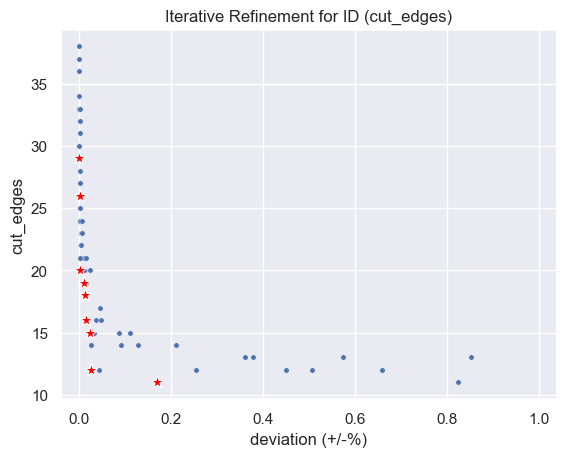

nondominated: [[0.0, 29], [0.0002175, 26], [0.00054374, 20], [0.00946112, 19], [0.01272357, 18], [0.01424605, 16], [0.02272843, 15], [0.02577339, 12], [0.16921265, 11]]


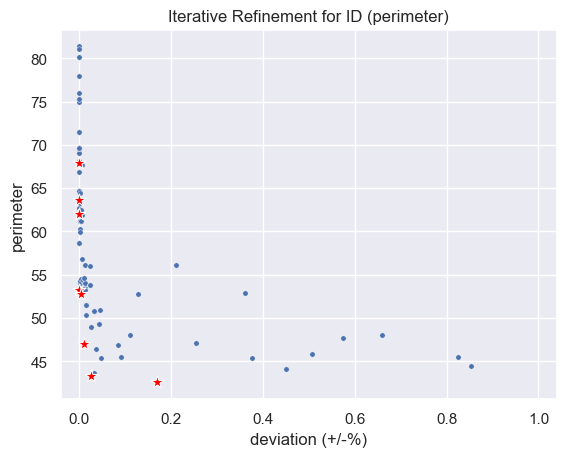

nondominated: [[0.0, 67.9286706], [0.0002175, 63.62857406], [0.00043499, 61.98416791], [0.00054374, 53.20350841], [0.0033712, 52.71536404], [0.00946112, 46.97556876], [0.02577339, 43.2408839], [0.16921265, 42.55377927]]


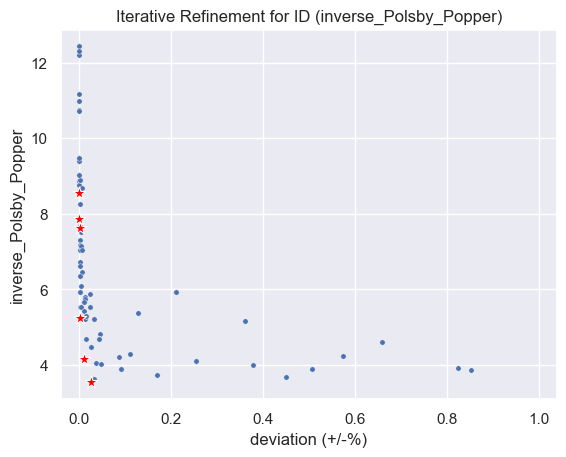

nondominated: [[0.0, 8.53980603], [0.0002175, 7.85863287], [0.00043499, 7.61358898], [0.00054374, 5.24488843], [0.00946112, 4.1532218], [0.02577339, 3.53768722]]


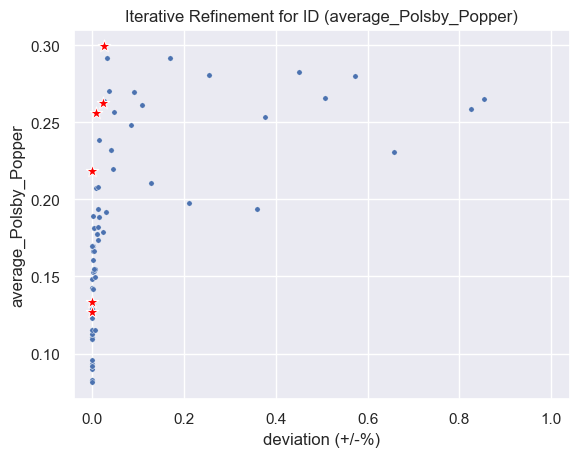

nondominated: [[0.0, 0.12727757], [0.0002175, 0.13368873], [0.00054374, 0.21860574], [0.00946112, 0.25603716], [0.02272843, 0.26247655], [0.02577339, 0.29923455]]


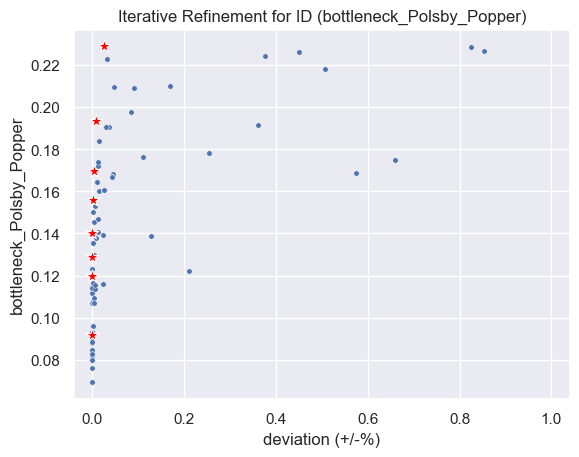

nondominated: [[0.0, 0.09177384], [0.0002175, 0.11964563], [0.00043499, 0.12878603], [0.00054374, 0.14044756], [0.00119623, 0.15566931], [0.0033712, 0.16963554], [0.00946112, 0.19352968], [0.02577339, 0.22883199]]
The state of ME has 2 districts.
Loaded 18 plans from file.


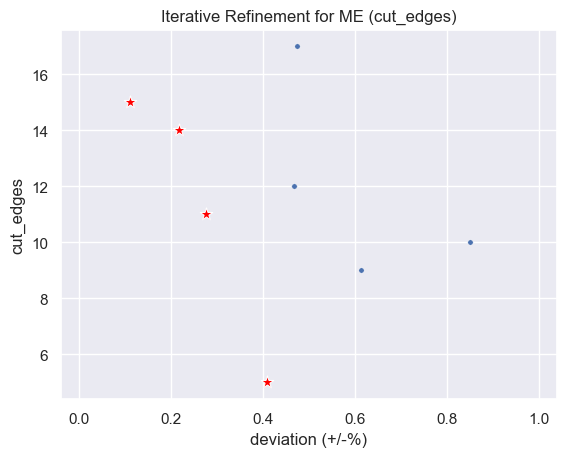

nondominated: [[0.11017654, 15], [0.21778401, 14], [0.27635887, 11], [0.40774862, 5]]


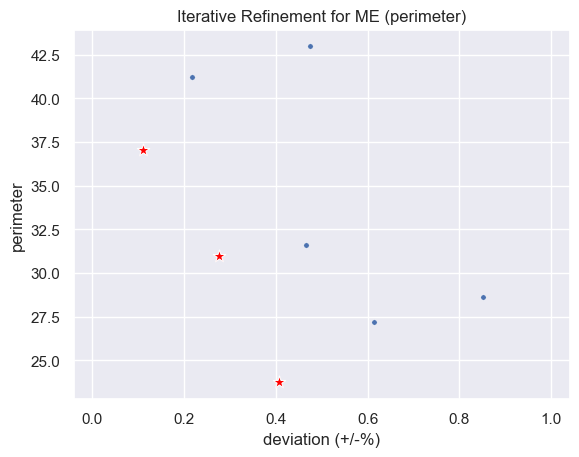

nondominated: [[0.11017654, 37.02237713], [0.27635887, 30.97998071], [0.40774862, 23.73376388]]


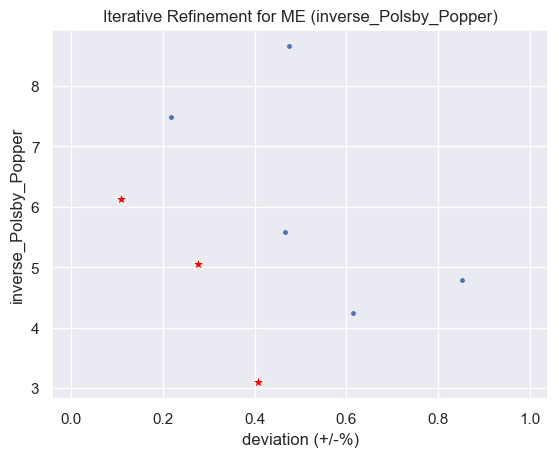

nondominated: [[0.11017654, 6.12689102], [0.27635887, 5.0474857], [0.40774862, 3.0940502]]


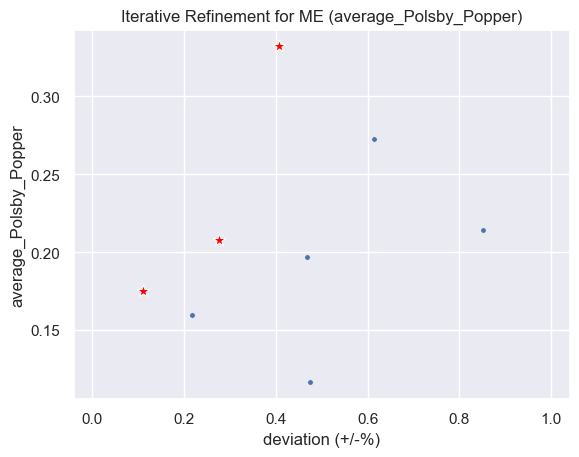

nondominated: [[0.11017654, 0.17519573], [0.27635887, 0.20765188], [0.40774862, 0.33204493]]


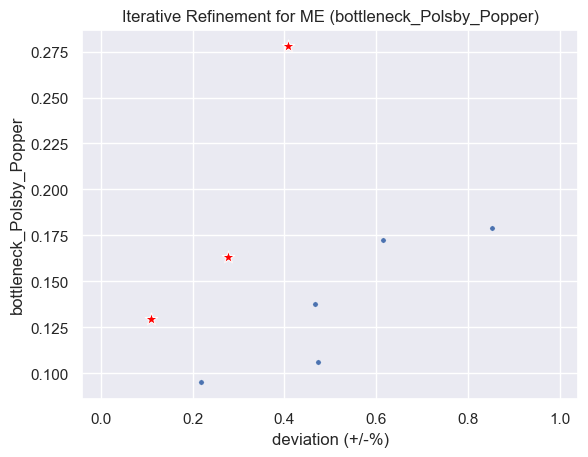

nondominated: [[0.11017654, 0.12938102], [0.27635887, 0.16315877], [0.40774862, 0.27785458]]
The state of NM has 3 districts.
Loaded 149 plans from file.


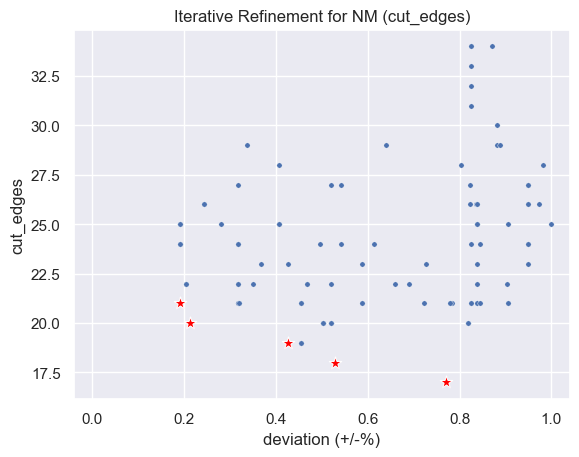

nondominated: [[0.19187522, 21], [0.21402375, 20], [0.42677243, 19], [0.52920347, 18], [0.76976768, 17]]


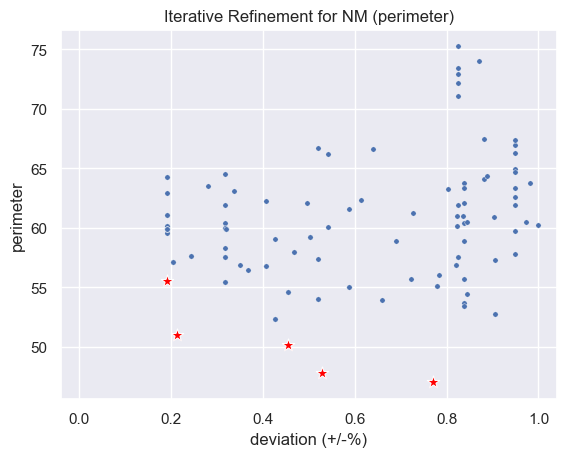

nondominated: [[0.19187522, 55.50700622], [0.21402375, 50.98912311], [0.45458796, 50.18372374], [0.52920347, 47.83933697], [0.76976768, 47.03393759]]


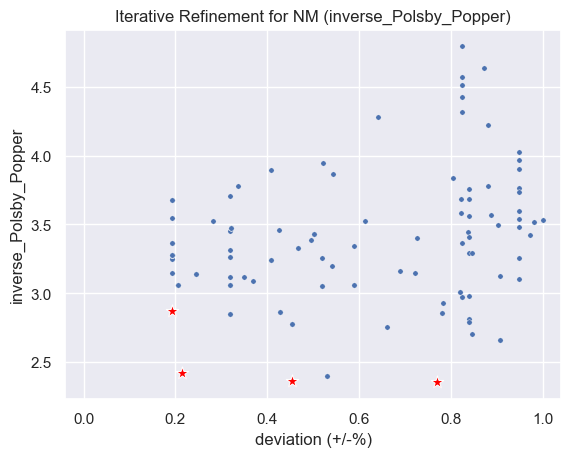

nondominated: [[0.19187522, 2.86747762], [0.21402375, 2.41654859], [0.45458796, 2.35928289], [0.76976768, 2.35129469]]


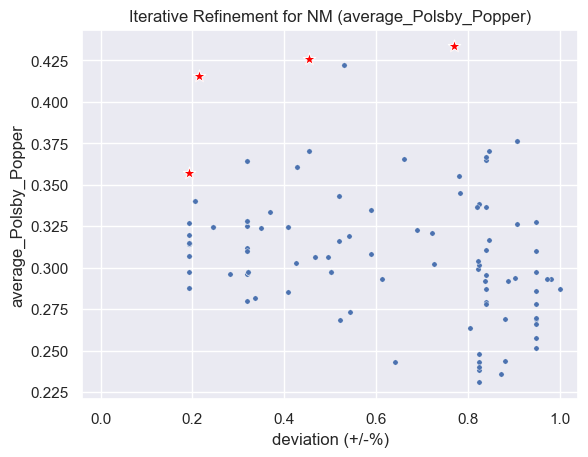

nondominated: [[0.19187522, 0.35677203], [0.21402375, 0.41550142], [0.45458796, 0.42576645], [0.76976768, 0.43342042]]


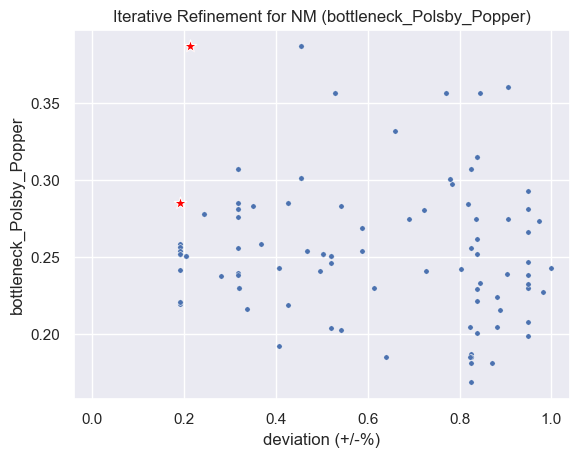

nondominated: [[0.19187522, 0.28517443], [0.21402375, 0.38658416]]
The state of NE has 3 districts.
Loaded 1399 plans from file.


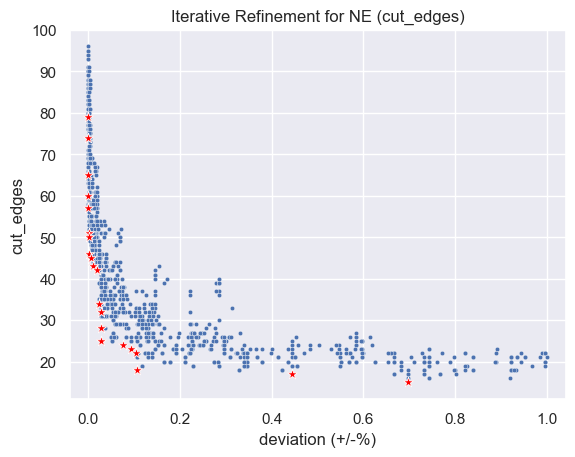

nondominated: [[0.00010196, 79], [0.00020393, 74], [0.00066276, 65], [0.00117257, 60], [0.00127453, 57], [0.00147846, 51], [0.00203925, 50], [0.00265103, 46], [0.00739229, 45], [0.01029822, 43], [0.01891406, 42], [0.0231455, 34], [0.02747891, 32], [0.0283456, 28], [0.02870247, 25], [0.07535034, 24], [0.09472323, 23], [0.10563323, 22], [0.106245, 18], [0.44470977, 17], [0.69660832, 15]]


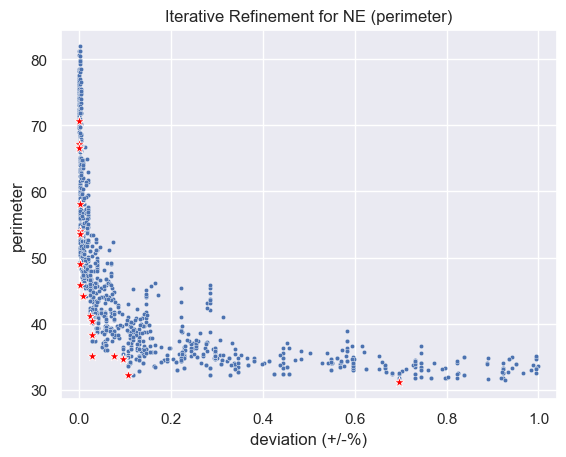

nondominated: [[0.00010196, 70.59759037], [0.00020393, 67.17503768], [0.00050981, 66.57988001], [0.00066276, 58.15371227], [0.00117257, 54.02407083], [0.00127453, 53.55460984], [0.00147846, 49.08248702], [0.00265103, 45.89637576], [0.00739229, 44.22052414], [0.0231455, 41.12351906], [0.02747891, 40.39938754], [0.0283456, 38.27164199], [0.02870247, 35.0821026], [0.07535034, 35.0507027], [0.09472323, 34.64831101], [0.106245, 32.20761305], [0.69660832, 31.12246649]]


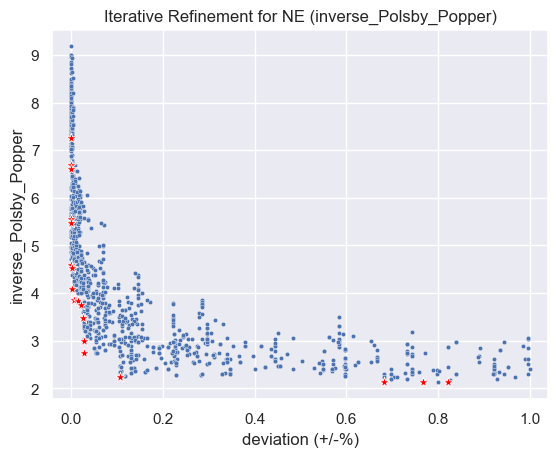

nondominated: [[0.00010196, 7.25750817], [0.00020393, 6.68946466], [0.00050981, 6.61058397], [0.00066276, 5.5512978], [0.00071374, 5.47685331], [0.00117257, 4.58504282], [0.00147846, 4.52690038], [0.00203925, 4.51912621], [0.00265103, 4.08261346], [0.00739229, 3.85638382], [0.01565126, 3.83360934], [0.0231455, 3.75500248], [0.02758088, 3.48464857], [0.0283456, 3.0012274], [0.02870247, 2.74295131], [0.106245, 2.2460203], [0.68187472, 2.13587676], [0.76589189, 2.13403293], [0.82186934, 2.12680844]]


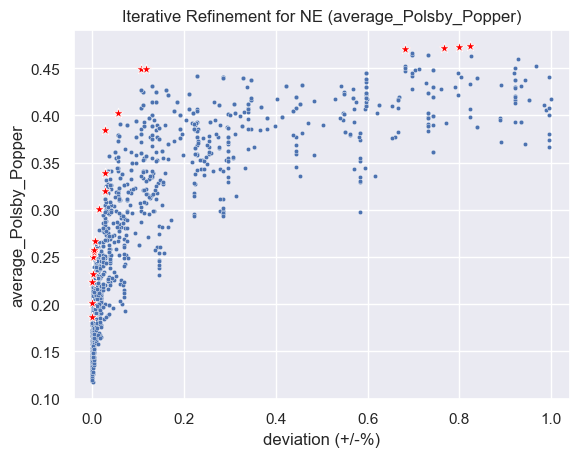

nondominated: [[0.00010196, 0.18649949], [0.00020393, 0.20121501], [0.00050981, 0.2230991], [0.00147846, 0.23160997], [0.00265103, 0.24960388], [0.00341575, 0.2549226], [0.0046393, 0.25758254], [0.00606677, 0.26646666], [0.0141728, 0.3010162], [0.02758088, 0.32000869], [0.0283456, 0.33890539], [0.02870247, 0.38449118], [0.05562059, 0.40247769], [0.106245, 0.44870264], [0.11705304, 0.4487403], [0.68187472, 0.47039669], [0.76589189, 0.47144628], [0.79892776, 0.47272128], [0.82186934, 0.47313548]]


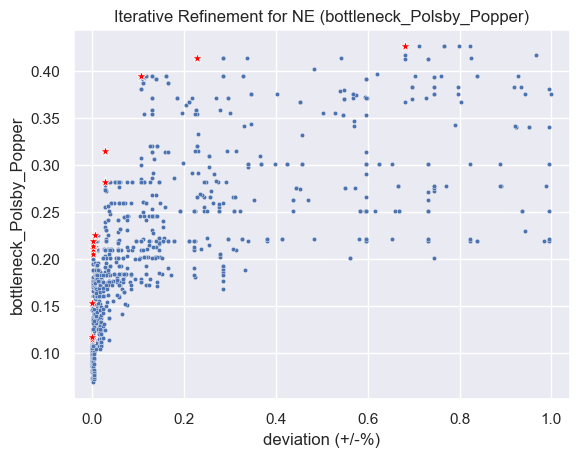

nondominated: [[0.00010196, 0.11494547], [0.00056079, 0.11666435], [0.00066276, 0.15331708], [0.00117257, 0.20537588], [0.00188631, 0.2105886], [0.00249808, 0.21374122], [0.00265103, 0.218769], [0.00555696, 0.22542934], [0.0283456, 0.28177537], [0.02870247, 0.31446753], [0.106245, 0.39471613], [0.22860009, 0.41342108], [0.68187472, 0.42630476]]
The state of AR has 4 districts.
Loaded 31272 plans from file.


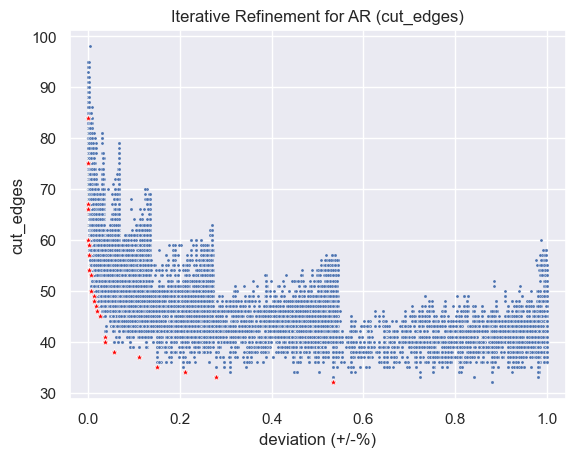

nondominated: [[0.00013282, 84], [0.00026565, 75], [0.00053129, 67], [0.00079694, 66], [0.00092976, 60], [0.00159388, 59], [0.00185952, 57], [0.00318775, 54], [0.00584422, 53], [0.00703963, 50], [0.01248537, 49], [0.01275102, 48], [0.01686854, 47], [0.02085323, 46], [0.02576768, 45], [0.036792, 41], [0.03692483, 40], [0.05618418, 38], [0.11143859, 37], [0.14969165, 35], [0.21211852, 34], [0.27799878, 33], [0.53421457, 32]]


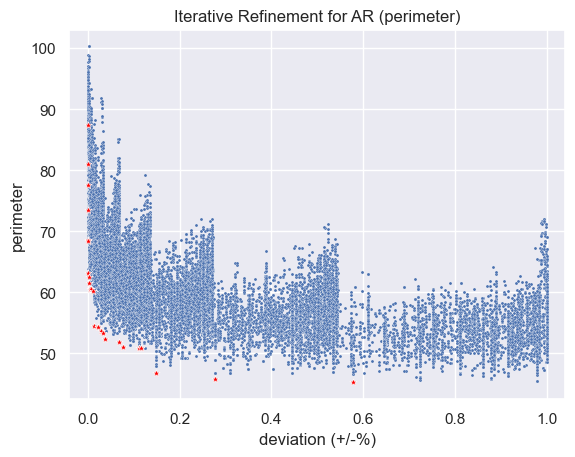

nondominated: [[0.00013282, 87.49728061], [0.00026565, 81.03346264], [0.00039847, 77.57708456], [0.00053129, 73.53492243], [0.00106258, 68.65001351], [0.00132823, 68.44437749], [0.00159388, 63.25144866], [0.00265646, 62.48746795], [0.00358622, 61.59677214], [0.00411752, 60.59572157], [0.00823503, 60.50131738], [0.01221973, 60.17445053], [0.01275102, 54.5057325], [0.02178299, 54.37815723], [0.02975238, 53.61909804], [0.03386989, 53.38829457], [0.036792, 52.39055392], [0.06773979, 51.93963275], [0.07624047, 51.11436444], [0.1109073, 50.92736945], [0.11515764, 50.86297873], [0.14969165, 46.83868453], [0.27799878, 45.87739339], [0.57711644, 45.27183119]]


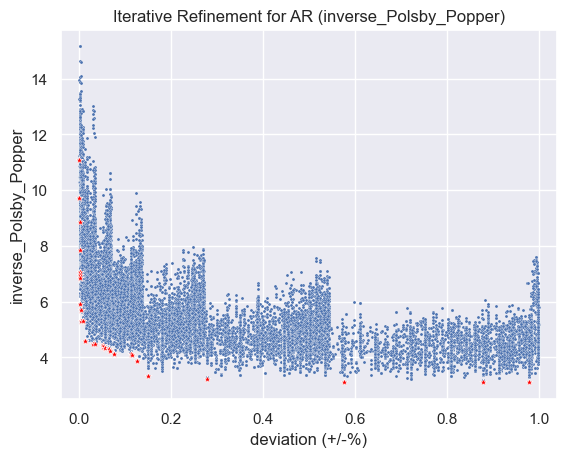

nondominated: [[0.00013282, 11.09442054], [0.00026565, 9.70691857], [0.00039847, 8.85080142], [0.00053129, 7.83573035], [0.00106258, 7.05693811], [0.00119541, 6.957509], [0.00132823, 6.84826759], [0.00159388, 5.90004846], [0.00265646, 5.68192067], [0.00411752, 5.3167777], [0.00823503, 5.30070444], [0.01275102, 4.58963558], [0.02975238, 4.49555597], [0.03386989, 4.46366428], [0.05100408, 4.44374336], [0.05166819, 4.38073687], [0.05485595, 4.33481074], [0.05618418, 4.33449196], [0.06468486, 4.2871894], [0.06773979, 4.23266266], [0.07624047, 4.10998975], [0.11143859, 4.10483524], [0.11515764, 4.06787662], [0.12551784, 3.86503669], [0.14969165, 3.31335488], [0.27799878, 3.22506075], [0.57711644, 3.11698202], [0.87902338, 3.11386046], [0.97930483, 3.10208648]]


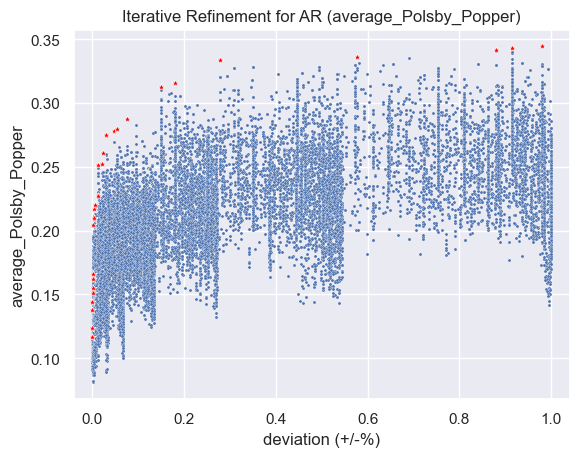

nondominated: [[0.00013282, 0.11646691], [0.00026565, 0.1167123], [0.00039847, 0.12360246], [0.00053129, 0.13756046], [0.00066412, 0.14402058], [0.00092976, 0.15080928], [0.00106258, 0.15488101], [0.00119541, 0.16242889], [0.00132823, 0.16576448], [0.00146105, 0.1661681], [0.00159388, 0.20418235], [0.00411752, 0.20943285], [0.00464881, 0.20959211], [0.00478163, 0.2172364], [0.00703963, 0.22008998], [0.01275102, 0.22704697], [0.01354796, 0.25148396], [0.02111888, 0.25254972], [0.02350969, 0.26050794], [0.02961955, 0.27519744], [0.0476835, 0.27796604], [0.05485595, 0.27941055], [0.07624047, 0.28754769], [0.14969165, 0.31242308], [0.18024097, 0.31538349], [0.27799878, 0.33366974], [0.57711644, 0.33615089], [0.87902338, 0.34130402], [0.91435433, 0.34331934], [0.97930483, 0.34446925]]


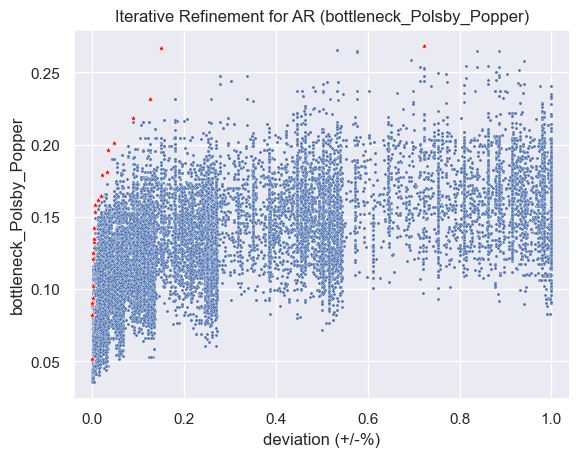

nondominated: [[0.00013282, 0.05187393], [0.00026565, 0.08229124], [0.00039847, 0.08895396], [0.00053129, 0.09050856], [0.00079694, 0.09371118], [0.00092976, 0.10214222], [0.00106258, 0.12106374], [0.00185952, 0.12466407], [0.00358622, 0.13244244], [0.00398469, 0.13456321], [0.00464881, 0.14231188], [0.00571139, 0.15339864], [0.00624269, 0.15825088], [0.01248537, 0.16175967], [0.01846241, 0.16449216], [0.02151734, 0.17927001], [0.03254166, 0.18074495], [0.03386989, 0.19601387], [0.04834761, 0.20145427], [0.08925713, 0.21853778], [0.12551784, 0.23141304], [0.14969165, 0.26684024], [0.72282339, 0.26807405]]
The state of KS has 4 districts.
Loaded 27687 plans from file.


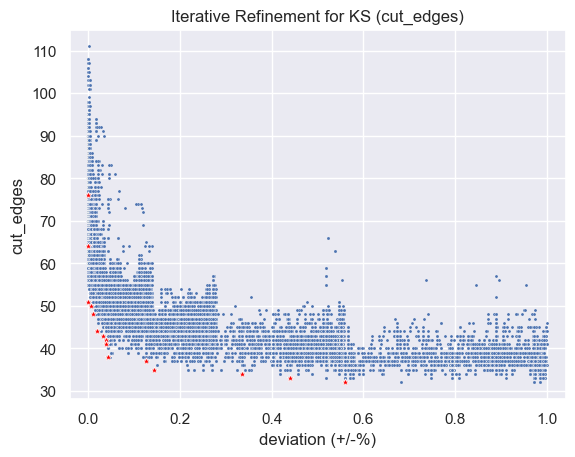

nondominated: [[0.00054461, 76], [0.00095307, 64], [0.00108922, 51], [0.00721609, 50], [0.01102836, 48], [0.02042289, 44], [0.03199586, 43], [0.03839503, 42], [0.04016502, 41], [0.04288807, 38], [0.12757499, 37], [0.1441856, 35], [0.33548001, 34], [0.44072597, 33], [0.56026795, 32]]


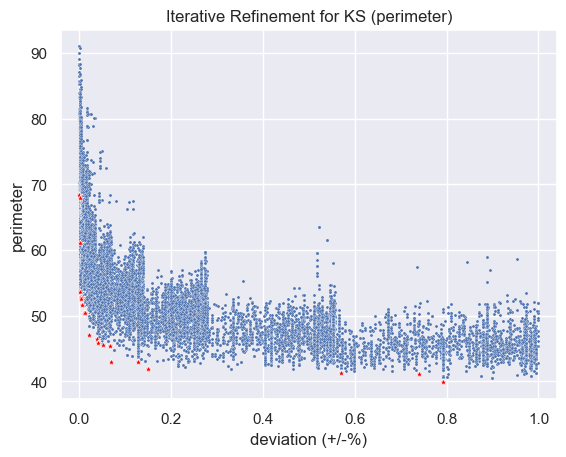

nondominated: [[0.00054461, 68.38522321], [0.00068076, 67.95823324], [0.00095307, 61.01646878], [0.00108922, 53.56455354], [0.00367612, 52.84754187], [0.00435688, 52.49411679], [0.00626302, 51.68205412], [0.01102836, 50.38657936], [0.0132068, 50.36547987], [0.02042289, 47.12073715], [0.03839503, 46.50966045], [0.04016502, 45.90598553], [0.05214645, 45.51909964], [0.06725938, 45.36325761], [0.06862091, 42.99954931], [0.12757499, 42.99358271], [0.15044862, 41.84190786], [0.57047939, 41.3098285], [0.74053399, 41.0962756], [0.79268044, 39.84754595]]


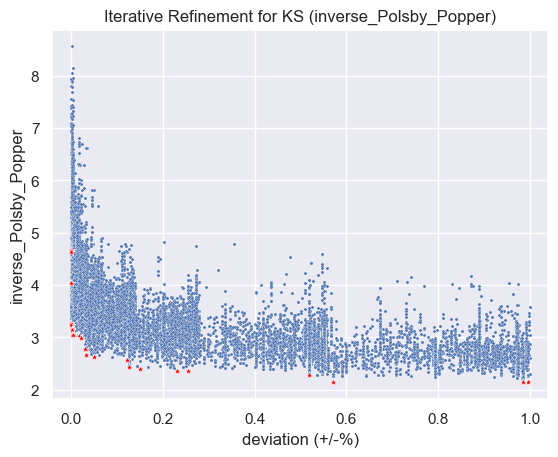

nondominated: [[0.00054461, 4.67624246], [0.00068076, 4.62965899], [0.00095307, 4.03461492], [0.00108922, 3.27786979], [0.00136153, 3.2296823], [0.00149768, 3.1602638], [0.0028592, 3.13743844], [0.00299536, 3.04961225], [0.0051738, 3.04674469], [0.01688292, 3.01903338], [0.02273748, 2.99414881], [0.03049818, 2.77910691], [0.03199586, 2.66599431], [0.05010416, 2.63110465], [0.12253734, 2.56848231], [0.12757499, 2.42966273], [0.15044862, 2.39262863], [0.2306425, 2.36125529], [0.25446921, 2.34711166], [0.51887756, 2.2713453], [0.57047939, 2.14489472], [0.98383869, 2.14053503], [0.99459474, 2.13795777]]


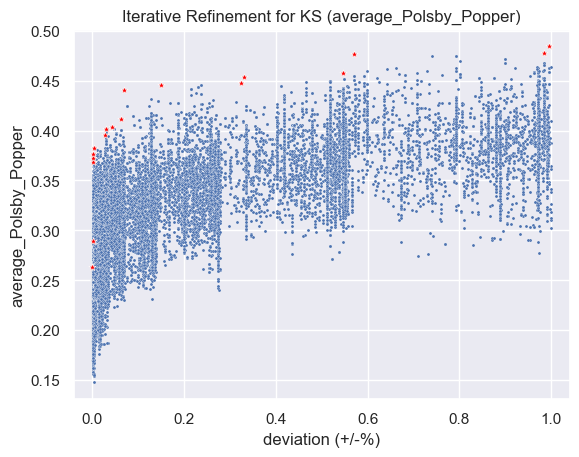

nondominated: [[0.00054461, 0.26324525], [0.00095307, 0.28921351], [0.00108922, 0.36827599], [0.00204229, 0.37242248], [0.0028592, 0.37620695], [0.00326766, 0.3826738], [0.0287282, 0.39548168], [0.03049818, 0.40187548], [0.04397729, 0.40328079], [0.06344711, 0.41200889], [0.06862091, 0.44114688], [0.15044862, 0.44593198], [0.32472395, 0.44805587], [0.33098697, 0.45409234], [0.5471973, 0.45806022], [0.57047939, 0.47649948], [0.98383869, 0.47794016], [0.99459474, 0.48437357]]


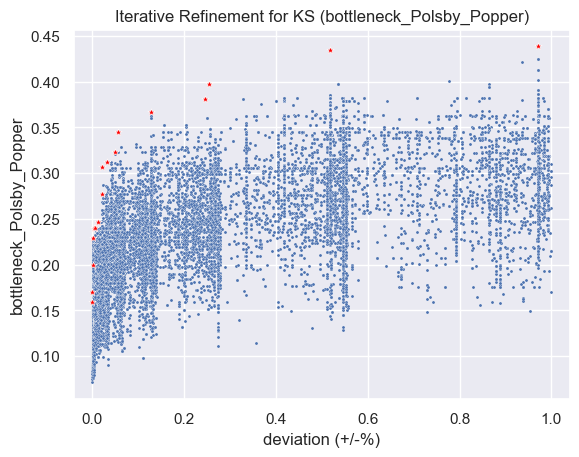

nondominated: [[0.00054461, 0.15924345], [0.00068076, 0.17053267], [0.00095307, 0.20010495], [0.00108922, 0.22869379], [0.00435688, 0.24013056], [0.00721609, 0.24056393], [0.01279834, 0.2467934], [0.02042289, 0.27761245], [0.02219287, 0.30661023], [0.03199586, 0.31263576], [0.05010416, 0.32348118], [0.05609487, 0.34518902], [0.12757499, 0.36634924], [0.24480237, 0.38109353], [0.25446921, 0.39779943], [0.51887756, 0.43471696], [0.97090419, 0.43854924]]
The state of MS has 4 districts.
Loaded 42429 plans from file.


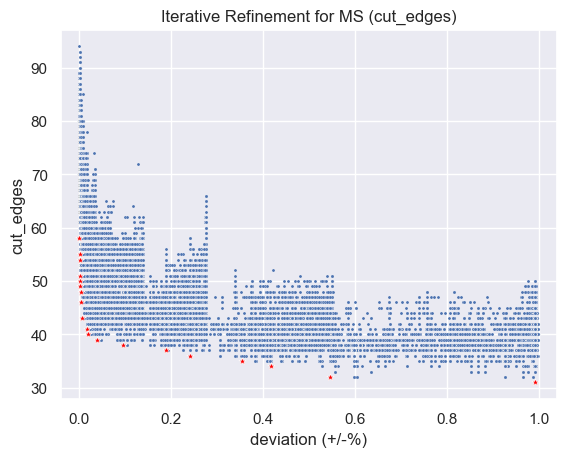

nondominated: [[0.00010131, 58], [0.00030392, 55], [0.00097931, 54], [0.00151961, 51], [0.00158715, 50], [0.00212746, 49], [0.00293792, 48], [0.00428869, 46], [0.00658499, 43], [0.01617544, 41], [0.01941729, 40], [0.03907096, 39], [0.09506028, 38], [0.18839832, 37], [0.24121334, 36], [0.3539349, 35], [0.4162053, 34], [0.54506853, 32], [0.99271295, 31]]


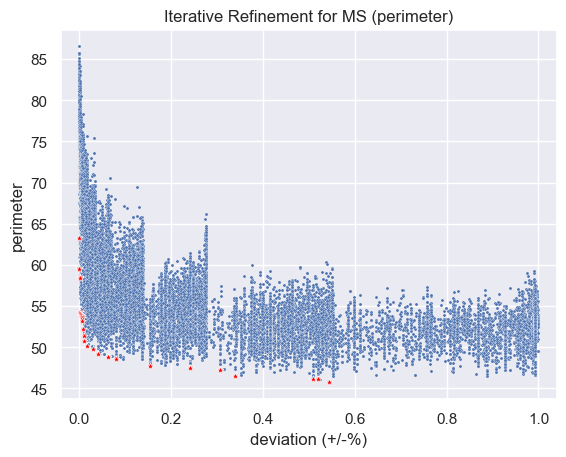

nondominated: [[0.00010131, 63.31533367], [0.00030392, 59.63013965], [0.00057408, 59.46538671], [0.00111438, 58.58704664], [0.00151961, 58.38687569], [0.00158715, 54.29314197], [0.0027353, 54.00961101], [0.00428869, 53.93519162], [0.0062473, 53.75735215], [0.00644992, 53.52890113], [0.00658499, 53.14547661], [0.00820591, 52.27771141], [0.00948914, 51.41837336], [0.01016453, 50.81969508], [0.01678329, 50.10810233], [0.02941297, 49.82756315], [0.04042172, 49.14665702], [0.06318216, 48.82009361], [0.08101229, 48.55078935], [0.1542239, 47.74280967], [0.24121334, 47.46951168], [0.30578004, 47.30377529], [0.338266, 46.53833841], [0.50988103, 46.19410845], [0.52102487, 46.0952298], [0.54473084, 45.74258443]]


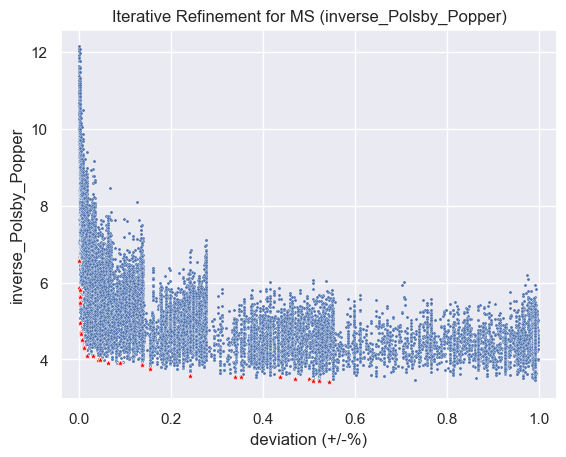

nondominated: [[0.00010131, 6.56745351], [0.00030392, 5.87030081], [0.00057408, 5.79476965], [0.00111438, 5.62701242], [0.00151961, 5.46242442], [0.00158715, 4.94338622], [0.0027353, 4.70761554], [0.00428869, 4.66901313], [0.00658499, 4.49993747], [0.00948914, 4.33334074], [0.01016453, 4.29065737], [0.01678329, 4.09389732], [0.0298182, 4.08356094], [0.04042172, 3.9930179], [0.04602741, 3.97473276], [0.06318216, 3.91230951], [0.08844151, 3.9054721], [0.13733931, 3.86382244], [0.1542239, 3.74846665], [0.24121334, 3.57833122], [0.338266, 3.54459062], [0.35224644, 3.54343542], [0.43633173, 3.53597377], [0.46854754, 3.49868249], [0.50015551, 3.49089623], [0.50988103, 3.45108314], [0.52102487, 3.44110331], [0.54473084, 3.40414244]]


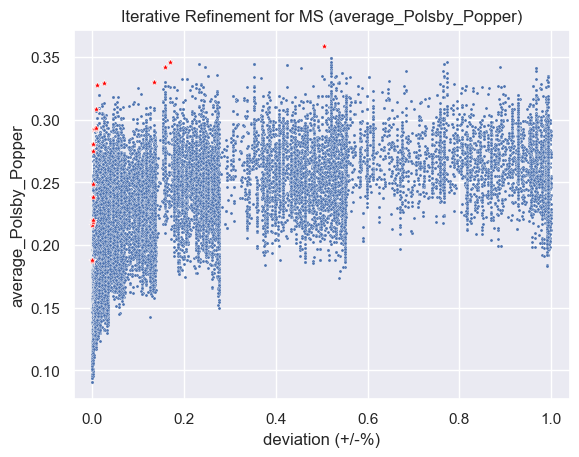

nondominated: [[0.00010131, 0.18757769], [0.00023638, 0.18765072], [0.00077669, 0.21629202], [0.00097931, 0.21858308], [0.00124946, 0.2200277], [0.00151961, 0.23835718], [0.00165469, 0.24871307], [0.00172223, 0.27521434], [0.00178977, 0.28023506], [0.00199238, 0.28096363], [0.00415361, 0.29287334], [0.00726038, 0.29358773], [0.00773315, 0.2937186], [0.00948914, 0.30847291], [0.01077237, 0.32782712], [0.02644128, 0.32907328], [0.13477285, 0.3304385], [0.15982959, 0.34185328], [0.16955511, 0.34593479], [0.50508581, 0.35852747]]


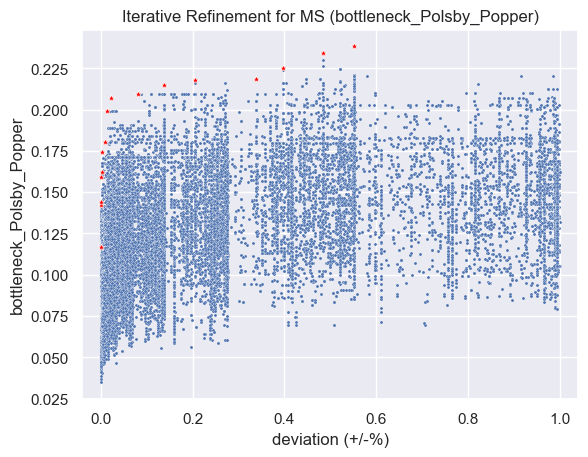

nondominated: [[0.00010131, 0.11650901], [0.00030392, 0.14192478], [0.000439, 0.14409516], [0.00057408, 0.15921324], [0.00205992, 0.16214503], [0.00226254, 0.17410976], [0.01016453, 0.18021647], [0.01333883, 0.19919676], [0.02353713, 0.20679808], [0.08080968, 0.20944372], [0.13787961, 0.21477759], [0.20514784, 0.21811275], [0.33779323, 0.21876711], [0.39742962, 0.22497199], [0.48320337, 0.23421324], [0.55229514, 0.2382881]]
The state of IA has 4 districts.
Loaded 53044 plans from file.


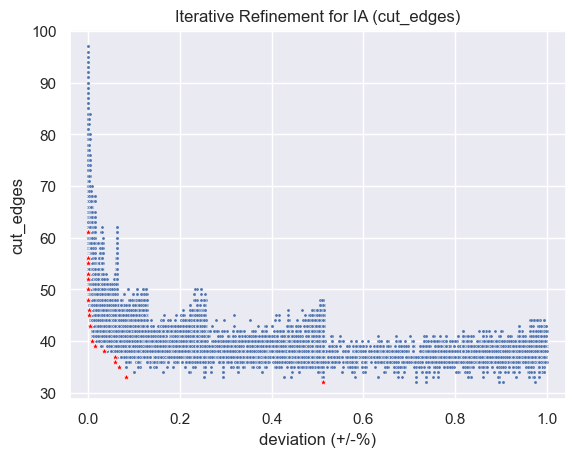

nondominated: [[9.403e-05, 61], [0.00021941, 56], [0.00047017, 55], [0.00053285, 53], [0.00072092, 52], [0.0008463, 50], [0.00090899, 48], [0.00166125, 46], [0.00297771, 45], [0.00448224, 43], [0.00786743, 40], [0.01570351, 39], [0.03407129, 38], [0.05795568, 37], [0.05964827, 36], [0.06848738, 35], [0.08315653, 33], [0.512762, 32]]


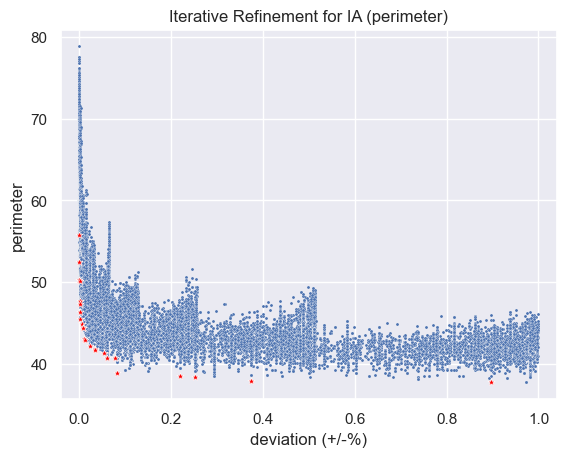

nondominated: [[9.403e-05, 55.79971669], [0.00021941, 52.50288033], [0.00047017, 50.26089766], [0.00072092, 50.09853554], [0.0008463, 47.64304933], [0.00090899, 47.32016388], [0.00128512, 46.3063491], [0.00166125, 45.49375313], [0.00661366, 44.81832441], [0.00786743, 44.33959616], [0.00899582, 44.32330363], [0.01068842, 43.02215229], [0.01350941, 42.88289643], [0.02385304, 42.21401617], [0.03432205, 41.82356722], [0.03532507, 41.67653017], [0.05494662, 41.26977491], [0.05964827, 40.66677168], [0.07901907, 40.65369163], [0.08315653, 38.90543802], [0.21912826, 38.47020646], [0.2526667, 38.31879538], [0.37359315, 37.89788177], [0.89610324, 37.72107176]]


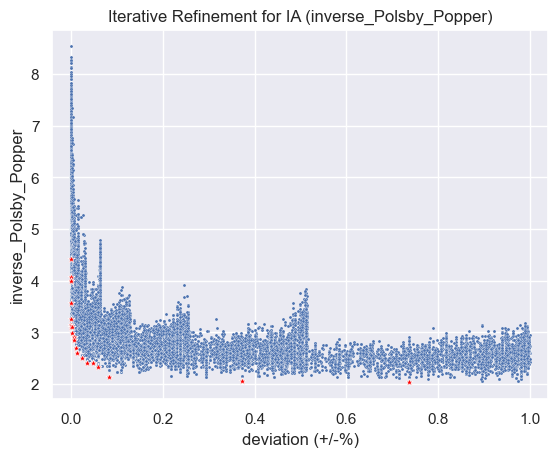

nondominated: [[9.403e-05, 4.41427396], [0.00021941, 4.06383732], [0.00040748, 4.00176717], [0.00047017, 3.56921338], [0.0008463, 3.25810395], [0.00090899, 3.14553373], [0.00128512, 3.10665178], [0.00166125, 3.1059947], [0.00172394, 2.97579278], [0.00648828, 2.90280642], [0.00661366, 2.85054427], [0.01068842, 2.70189142], [0.01350941, 2.59192373], [0.02385304, 2.49735825], [0.03432205, 2.41224429], [0.04861507, 2.41219258], [0.05964827, 2.33396413], [0.08315653, 2.12459464], [0.37359315, 2.05699411], [0.73687401, 2.0294557]]


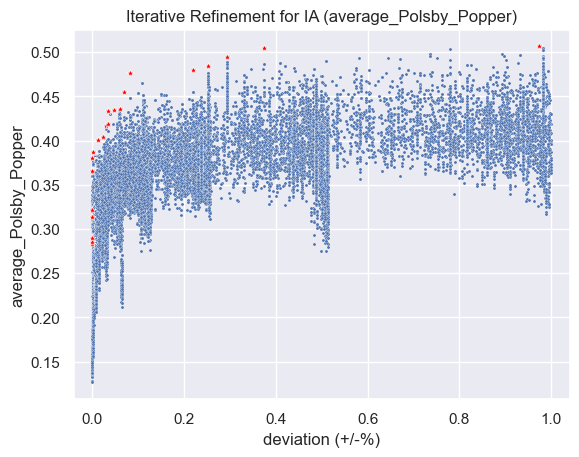

nondominated: [[9.403e-05, 0.2826099], [0.0002821, 0.28531895], [0.00034479, 0.28928562], [0.00047017, 0.31307764], [0.00053285, 0.32167197], [0.00059554, 0.36523742], [0.0008463, 0.38000852], [0.00222545, 0.38728726], [0.01350941, 0.40012659], [0.02385304, 0.40397275], [0.02993384, 0.41689454], [0.03375785, 0.41860242], [0.03432205, 0.4331506], [0.04861507, 0.43465938], [0.06159162, 0.43546923], [0.06848738, 0.45458366], [0.08315653, 0.47624911], [0.21912826, 0.47996713], [0.2526667, 0.48460561], [0.29379047, 0.49414332], [0.37359315, 0.50419962], [0.973273, 0.50649197]]


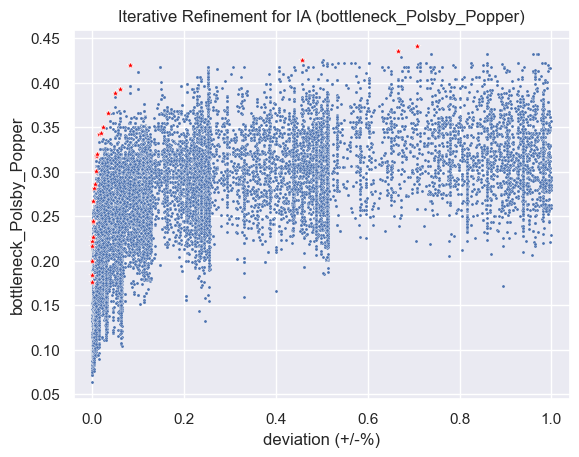

nondominated: [[9.403e-05, 0.17572025], [0.00015672, 0.18410254], [0.00021941, 0.19963734], [0.00040748, 0.21695789], [0.00047017, 0.22156768], [0.00078361, 0.22687139], [0.0008463, 0.24282861], [0.00090899, 0.24440281], [0.00128512, 0.26722019], [0.00297771, 0.28212903], [0.00667634, 0.2859615], [0.00780474, 0.30065608], [0.00786743, 0.31768394], [0.01068842, 0.32015476], [0.01513931, 0.34202287], [0.02009172, 0.34287007], [0.02385304, 0.35064169], [0.03532507, 0.36611706], [0.04892851, 0.38812686], [0.05964827, 0.392987], [0.08315653, 0.41958457], [0.45678102, 0.42533503], [0.66660001, 0.43514402], [0.70841335, 0.44076325]]
The state of WV has 3 districts.
Loaded 1575 plans from file.


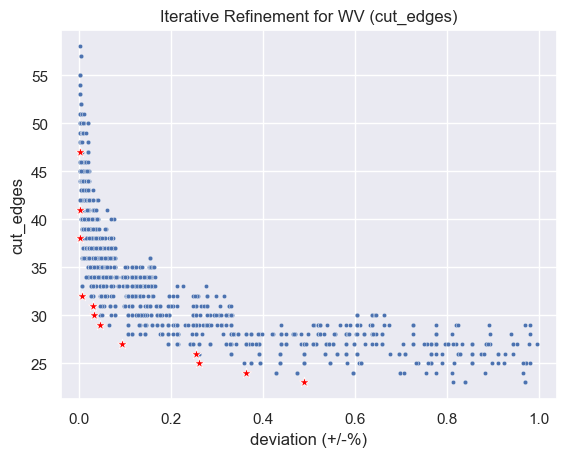

nondominated: [[0.00037777, 47], [0.00059363, 41], [0.00075553, 38], [0.00491097, 32], [0.02924996, 31], [0.0316245, 30], [0.04527807, 29], [0.09233705, 27], [0.2531039, 26], [0.2599037, 25], [0.36308806, 24], [0.48807497, 23]]


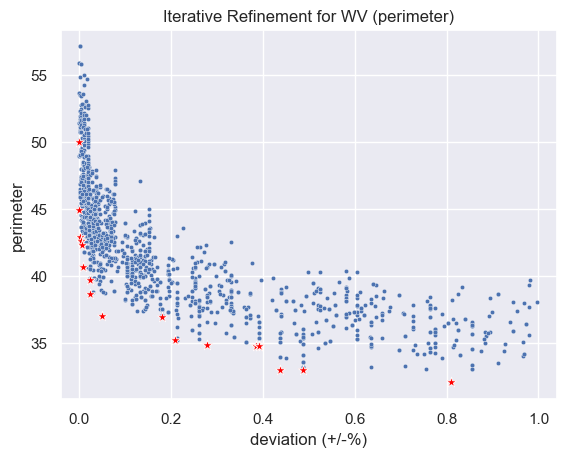

nondominated: [[0.00037777, 49.95693804], [0.00059363, 44.90250397], [0.00172693, 42.86333302], [0.00491097, 42.55231046], [0.00685377, 42.27817542], [0.00895847, 40.62029489], [0.02358345, 39.63245421], [0.02423106, 38.60693923], [0.04959541, 36.96266331], [0.1801409, 36.94013712], [0.20858136, 35.16448608], [0.27771272, 34.80025246], [0.38537632, 34.77081271], [0.39136662, 34.73453554], [0.39233802, 34.71414792], [0.43750816, 32.92164973], [0.48807497, 32.91584247], [0.8105261, 32.02294818]]


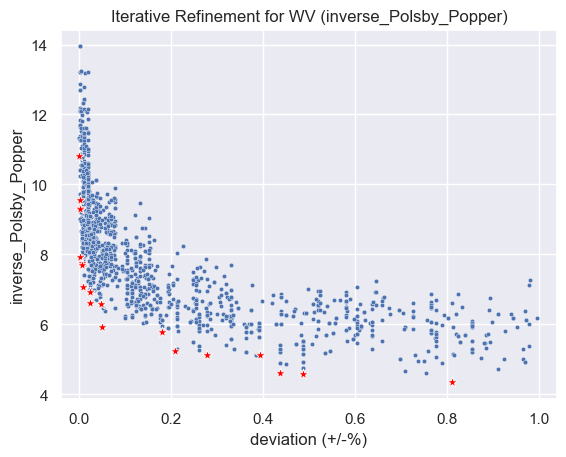

nondominated: [[0.00037777, 10.81025802], [0.00059363, 9.56897967], [0.00075553, 9.31766138], [0.00140313, 9.28453806], [0.00172693, 7.93418487], [0.00491097, 7.74840634], [0.00685377, 7.69341638], [0.00895847, 7.07847757], [0.02385329, 6.92422179], [0.02423106, 6.61441562], [0.04749071, 6.58307328], [0.04959541, 5.91584471], [0.1801409, 5.76759871], [0.20858136, 5.2375114], [0.27771272, 5.13036674], [0.39233802, 5.11196446], [0.43750816, 4.60759228], [0.48807497, 4.58307439], [0.8105261, 4.34116325]]


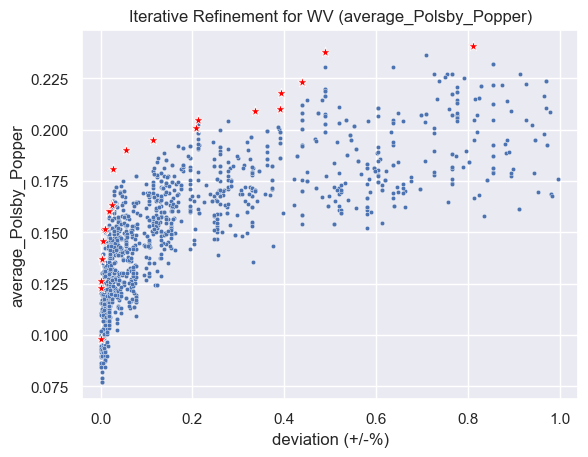

nondominated: [[0.00037777, 0.09813065], [0.00059363, 0.12301362], [0.00172693, 0.12637675], [0.00205074, 0.13648321], [0.00399354, 0.13686955], [0.00491097, 0.14574073], [0.00652997, 0.15122387], [0.00949814, 0.15163127], [0.01786298, 0.15994], [0.01872645, 0.16054435], [0.02385329, 0.16315631], [0.02746906, 0.18095402], [0.05607142, 0.19021873], [0.11505704, 0.1949876], [0.20858136, 0.20066654], [0.21295266, 0.20456476], [0.33648247, 0.209046], [0.39136662, 0.21021456], [0.39233802, 0.21766047], [0.43750816, 0.22336178], [0.48807497, 0.23795477], [0.8105261, 0.2405165]]


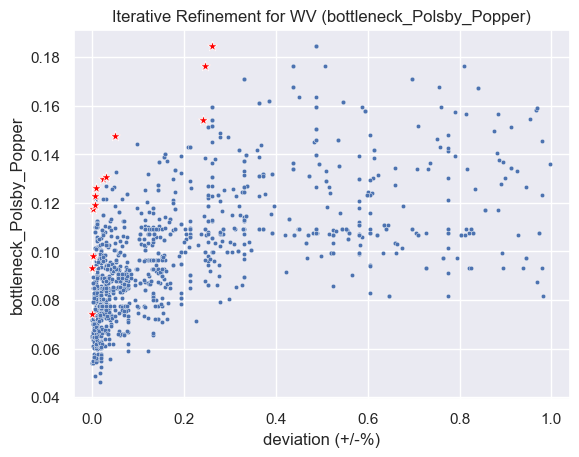

nondominated: [[0.00037777, 0.07417136], [0.00075553, 0.09335848], [0.00140313, 0.0981415], [0.00172693, 0.11732595], [0.00555857, 0.11892734], [0.00685377, 0.12280802], [0.00895847, 0.12595067], [0.02423106, 0.13001403], [0.03065309, 0.13049655], [0.04959541, 0.14751206], [0.24182485, 0.15421797], [0.24668186, 0.17613892], [0.2599037, 0.18442312]]


In [4]:
for (state, year) in pairs:
    filepath = '../../dat/' + str(year) + '/'
    filename = state + '_county.json'
    filename2 = state + '_county.shp'

    G = read_graph_from_json(state, filepath + filename, year=year)
    print(f"The state of {state} has {G._k} districts.")
    G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

    #import warm starts
    module = importlib.import_module(state + '_plans_' + str(year) )
    plans = module.plans
    print(f"Loaded {len(plans)} plans from file.")
    warm_starts = plans

    plans_scores = dict()
    for obj_type in objective_types:
        plans_scores[obj_type] = [scores(G, plan, G._ideal_population, obj_type) for plan in warm_starts]

    for obj_type in objective_types:
        plot_pareto_frontier_sns(
            np.array([ round(plans_scores[obj_type][j][0],8) for j in range(len(plans_scores[obj_type])) ]), 
            np.array([ round(plans_scores[obj_type][j][1],8) for j in range(len(plans_scores[obj_type])) ]), 
            maxX=False, 
            maxY=True if obj_type in {'bottleneck_Polsby_Popper','average_Polsby_Popper'} else False, 
            xlabel='deviation (+/-%)', 
            ylabel=obj_type,
            title="Iterative Refinement for " + state + " (" + obj_type + ")"
        )